In [1]:
import pandas as pd
import numpy as np
import umap
from pandas.plotting import scatter_matrix
import warnings, tqdm
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
data=pd.read_csv('CARN_fulldata_transcriptome.txt',sep='\t',header=None)
data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,NaN,NaN,NaN,NaN,outliers 1,New Value,New Value,New Value,OUT,...,New Value,New Value,New Value,New Value,New Value,New Value,New Value,New Value,New Value,New Value
1,NaN,NaN,NaN,NaN,NaN,slide,278,278,278,278,...,279,279,278,278,278,278,279,279,279,279
2,NaN,NaN,NaN,NaN,NaN,groups,CONT,CONT,CONT,BMA,...,CONT,CONT,BMA,BMA,BMA,BMA,CARN,CARN,CARN,CARN
3,NaN,NaN,NaN,NaN,NaN,labellling Cont,1,1,2,1,...,2,2,1,1,2,2,1,1,2,2
4,noname,Gene_Symbol,p-value,q-value,Fold change,Row annotation 1,BMAControl,BMAControl,BMAControl,BMAControl,...,CarnControl,CarnControl,BMA,BMA,BMA,BMA,Carnitine,Carnitine,Carnitine,Carnitine
5,EMBV3_43505,TRMT11,0.00029607541857728256,1,1.1968715377156505,NaN,1.2068,0.9612,1.0925,9.2145,...,0.94522,0.89199,1.3612,1.2848,1.145,1.0692,1.1685,1.2375,1.1385,1.153
6,EMBV3_31291,NaN,0.00033484779936526814,1,1.302931136620988,NaN,1.8298,1.2109,0.48152,8.925,...,0.45825,0.41724,0.96862,0.84339,0.90992,0.84918,0.91939,0.77039,0.8282,0.86337
7,EMBV3_19453,LOC100337057,0.0003394412776328342,1,1.0946097647866282,NaN,-1.1657,-1.1379,-0.93517,6.9741,...,-1.151,-1.1484,-0.99351,-1.1751,-1.0944,-1.2768,-1.0122,-1.0187,-1.0611,-1.0122
8,EMBV3_27041,CDA,0.0003472589841683397,1,0.7319147356900109,NaN,-0.30661,-0.29124,0.36864,8.4889,...,0.86477,0.93636,0.42521,0.47067,0.35542,0.49513,0.39773,0.4382,0.3315,0.46304
9,EMBV3_18929,NaN,0.0005324135974806856,1,0.7305040760866797,NaN,-0.061195,0.10638,0.46036,8.5456,...,0.98972,1.0356,0.49113,0.72174,0.41057,0.70873,0.60239,0.66433,0.49108,0.64115


In [3]:
probe_name=data.iloc[4:,0]
probe_name=pd.DataFrame(probe_name)
probe_name=probe_name.T
origin_value=data.iloc[4:,-7:]
origin_value.head()

,15,16,17,18,19,20,21
4,BMA,BMA,BMA,Carnitine,Carnitine,Carnitine,Carnitine
5,1.2848,1.145,1.0692,1.1685,1.2375,1.1385,1.153
6,0.84339,0.90992,0.84918,0.91939,0.77039,0.8282,0.86337
7,-1.1751,-1.0944,-1.2768,-1.0122,-1.0187,-1.0611,-1.0122
8,0.47067,0.35542,0.49513,0.39773,0.4382,0.3315,0.46304


In [4]:
origin_value=pd.DataFrame(origin_value)
origin_value=origin_value.T
origin_value.shape

(7, 43808)

In [5]:
trans_data=pd.concat([probe_name,origin_value],ignore_index=True)
trans_data.head()

,4,5,6,7,8,9,10,11,12,13,...,43802,43803,43804,43805,43806,43807,43808,43809,43810,43811
0,noname,EMBV3_43505,EMBV3_31291,EMBV3_19453,EMBV3_27041,EMBV3_18929,EMBV3_14345,EMBV3_11544,EMBV3_40540,EMBV3_26939,...,ETG05_66023,ETG07_105829,ETG08_142674,ETG09_205211,ETG09_35454,ETG09_48764,ETG10_13482,ETG10_195139,ETG10_234183,ETG10_236652
1,BMA,1.2848,0.84339,-1.1751,0.47067,0.72174,-1.0604,0.37986,0.16266,1.3656,...,-1.1591,-1.2178,-1.4043,-1.0347,-1.1803,-1.3489,-1.4625,-0.9063,-0.97286,-1.0266
2,BMA,1.145,0.90992,-1.0944,0.35542,0.41057,-0.98817,0.4424,0.10705,1.0836,...,-1.2064,-1.0659,-1.1116,-1.112,-1.1293,-1.0413,-1.2376,-0.94946,-0.92218,-4.2929
3,BMA,1.0692,0.84918,-1.2768,0.49513,0.70873,-1.055,0.37254,-0.0015961,1.2004,...,-1.1268,-1.1736,-1.213,-1.1167,-1.1331,-1.1023,-1.1162,-1.0163,-1.032,-1.1504
4,Carnitine,1.1685,0.91939,-1.0122,0.39773,0.60239,-1.0042,0.32859,-0.13163,1.223,...,-1.3114,-1.2055,-1.3578,-1.0422,-1.1174,-1.2361,-1.4139,-1.0083,-1.127,-1.3742


In [6]:
trans_data=pd.concat([probe_name,origin_value],ignore_index=True)
trans_data=trans_data.rename(columns=trans_data.iloc[0]).drop(trans_data.index[0])
trans_data.head(10)

,noname,EMBV3_43505,EMBV3_31291,EMBV3_19453,EMBV3_27041,EMBV3_18929,EMBV3_14345,EMBV3_11544,EMBV3_40540,EMBV3_26939,...,ETG05_66023,ETG07_105829,ETG08_142674,ETG09_205211,ETG09_35454,ETG09_48764,ETG10_13482,ETG10_195139,ETG10_234183,ETG10_236652
1,BMA,1.2848,0.84339,-1.1751,0.47067,0.72174,-1.0604,0.37986,0.16266,1.3656,...,-1.1591,-1.2178,-1.4043,-1.0347,-1.1803,-1.3489,-1.4625,-0.9063,-0.97286,-1.0266
2,BMA,1.145,0.90992,-1.0944,0.35542,0.41057,-0.98817,0.4424,0.10705,1.0836,...,-1.2064,-1.0659,-1.1116,-1.112,-1.1293,-1.0413,-1.2376,-0.94946,-0.92218,-4.2929
3,BMA,1.0692,0.84918,-1.2768,0.49513,0.70873,-1.055,0.37254,-0.0015961,1.2004,...,-1.1268,-1.1736,-1.213,-1.1167,-1.1331,-1.1023,-1.1162,-1.0163,-1.032,-1.1504
4,Carnitine,1.1685,0.91939,-1.0122,0.39773,0.60239,-1.0042,0.32859,-0.13163,1.223,...,-1.3114,-1.2055,-1.3578,-1.0422,-1.1174,-1.2361,-1.4139,-1.0083,-1.127,-1.3742
5,Carnitine,1.2375,0.77039,-1.0187,0.4382,0.66433,-0.99599,0.50707,0.0072014,1.2848,...,-1.3209,-1.3291,1.0461,-1.2739,-1.1391,-1.1795,-1.5159,-1.0297,-1.1571,-0.99684
6,Carnitine,1.1385,0.8282,-1.0611,0.3315,0.49108,-1.0022,0.24052,0.0011684,1.1208,...,-1.204,-1.076,-1.1415,-1.1568,-1.0113,-1.0444,-1.1455,-0.91662,-0.94596,-2.8812
7,Carnitine,1.153,0.86337,-1.0122,0.46304,0.64115,-1.0347,0.45316,0.10491,1.2855,...,-1.2159,-1.1426,-1.0387,-1.1164,-1.0616,-1.1225,-1.2303,-0.97495,-1.0072,-2.0717


In [7]:
trans_genes=pd.read_csv('Trans genes for TDA.csv',header=None)
trans_genes=trans_genes.loc[1:].T.values.tolist()
trans_genes

[['EMBV3_36880',
  'EMBV3_12193',
  'EMBV3_32069',
  'EMBV3_12200',
  'EMBV3_07752',
  'EMBV3_01993',
  'EMBV3_04815',
  'EMBV3_35222',
  'EMBV3_11544',
  'EMBV3_39314',
  'EMBV3_14555',
  'EMBV3_15382',
  'EMBV3_32008',
  'EMBV3_35013',
  'EMBV3_04354',
  'EMBV3_35158',
  'EMBV3_14527',
  'EMBV3_23352',
  'EMBV3_29779',
  'EMBV3_30249',
  'EMBV3_43215',
  'EMBV3_07113',
  'EMBV3_02644',
  'EMBV3_11519',
  'EMBV3_18935',
  'EMBV3_43391',
  'EMBV3_17007',
  'EMBV3_33890',
  'EMBV3_38592',
  'EMBV3_08281',
  'EMBV3_33668',
  'EMBV3_40540',
  'EMBV3_39552',
  'EMBV3_01526',
  'EMBV3_01600',
  'EMBV3_17716',
  'EMBV3_13848',
  'EMBV3_31335',
  'EMBV3_32631',
  'EMBV3_18274',
  'EMBV3_23767',
  'EMBV3_20772',
  'EMBV3_34560',
  'EMBV3_33432',
  'EMBV3_03249',
  'EMBV3_13357',
  'EMBV3_12355',
  'EMBV3_11034',
  'EMBV3_22139',
  'EMBV3_20737',
  'EMBV3_16014',
  'EMBV3_38302',
  'EMBV3_04113',
  'EMBV3_25091',
  'EMBV3_12962',
  'EMBV3_25826',
  'EMBV3_33523',
  'EMBV3_31308',
  'EMBV3_29577

In [8]:
len(trans_genes[0])

319

In [9]:
trans_list=[]
for i in trans_genes[0]:
    trans_list.append(i)
trans_list[:5]

['EMBV3_36880', 'EMBV3_12193', 'EMBV3_32069', 'EMBV3_12200', 'EMBV3_07752']

In [10]:
tr_data=trans_data[trans_list].astype(float)
tr_data.head()

,EMBV3_36880,EMBV3_12193,EMBV3_32069,EMBV3_12200,EMBV3_07752,EMBV3_01993,EMBV3_04815,EMBV3_35222,EMBV3_11544,EMBV3_39314,...,EMBV3_03231,EMBV3_20746,EMBV3_26710,EMBV3_36296,EMBV3_31754,EMBV3_33832,EMBV3_29960,EMBV3_34178,EMBV3_33527,EMBV3_11126
1,0.78856,0.30980,0.45520,0.27290,1.20460,0.59940,3.0499,-0.88833,0.37986,2.1813,...,0.97186,0.85033,0.55240,-0.65308,0.275180,2.7676,1.2892,3.0976,-0.69580,-0.18203
2,0.96283,0.29269,0.36333,0.97767,1.27380,1.00800,3.0815,-0.94729,0.44240,2.2735,...,0.66284,0.91790,1.38480,-0.63686,-0.151420,2.9563,1.1737,3.2927,-0.69256,-0.22332
3,0.90285,0.15004,0.56152,0.59460,0.96886,0.50069,3.1190,-0.90261,0.37254,2.2699,...,0.59555,0.90740,0.94721,-0.50811,0.122530,2.7820,1.1641,3.1123,-0.82646,-0.56827
4,0.68043,0.08208,0.47864,0.77010,1.48300,0.81220,3.0931,-0.90369,0.32859,2.1356,...,1.35330,0.95092,0.69904,-0.60301,0.097478,2.9659,1.3760,3.4502,-0.84132,-0.32431
5,0.71334,0.14628,0.65695,0.35845,1.06720,0.32257,3.2191,-0.87256,0.50707,2.1100,...,0.85976,0.71841,0.38268,-0.61438,0.109410,2.5873,1.3454,3.1748,-0.74454,-0.38822


In [11]:
Meth_data=pd.read_csv('CARN_METH_Full data.txt',sep='\t',header=None)
Meth_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outliers,New Value,New Value,New Value,New Value,New Value,New Value,New Value
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Slides,Slide 29 & 30,Slide 29 & 30,Slide 29 & 30,Slide 29 & 30,Slide 29 & 30,Slide 29 & 30,Slide 29 & 30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Labelling,1,1,2,1,1,2,2
3,noname,Chromosome,CpG,CpG_Density,CpG_Distance,CpG_Length,Cpg_Island,Distal_Promoter,EMBV3_Probe,Exon,...,R-statistic,Correlation (%),Row annotation 1,CarnControl,CarnControl,CarnControl,Carnitine,Carnitine,Carnitine,Carnitine
4,EDMA_MET_07_03224,chr7,13,0,434,0,98,NaN,EMBV3_26746,NaN,...,-0.9924170411634441,NaN,NaN,-1.0185,-1.046,-1.0657,-1.5283,-1.4974,-1.5776,-1.5899
5,EDMA_MET_13_01669,chr13,4,0,1907,0,0,NaN,NaN,NaN,...,-0.988194115407795,NaN,NaN,-0.18145,-0.29707,-0.27404,-0.83233,-0.96751,-0.89455,-0.87696
6,EDMA_MET_10_09237,chr10,6,0,456097,0,0,NaN,NaN,NaN,...,-0.9872469753696997,NaN,NaN,0.042581,0.13149,0.061149,-0.90027,-1.1804,-0.92656,-1.0187
7,EDMA_MET_11_13642,chr11,33,13.4,11,209,209,NaN,EMBV3_33912,NaN,...,0.9867434865915646,NaN,NaN,-1.6568,-1.6874,-1.7433,-0.90874,-0.79483,-0.73321,-0.94776
8,EDMA_MET_26_07394,chr26,14,0,-54209,0,0,NaN,NaN,NaN,...,-0.9843871738696163,NaN,NaN,-0.19041,-0.26006,-0.18819,-0.69021,-0.66901,-0.67903,-0.79417
9,EDMA_MET_23_10353,chr23,9,0,3236,0,0,NaN,EMBV3_17559,NaN,...,-0.9821903027404402,NaN,NaN,0.4544,0.58714,0.63799,-0.21973,-0.35054,-0.37788,-0.18747


In [12]:
Meth_name=Meth_data.loc[4:,0]
Meth_name.head()

4    EDMA_MET_07_03224
5    EDMA_MET_13_01669
6    EDMA_MET_10_09237
7    EDMA_MET_11_13642
8    EDMA_MET_26_07394
Name: 0, dtype: object

In [13]:
Meth_name=pd.DataFrame(Meth_name)
Meth_name=Meth_name.T
meth_origin_value=Meth_data.iloc[4:,-7:].T
me_data=pd.concat([Meth_name,meth_origin_value],ignore_index=True)
me_data.head()

,4,5,6,7,8,9,10,11,12,13,...,417662,417663,417664,417665,417666,417667,417668,417669,417670,417671
0,EDMA_MET_07_03224,EDMA_MET_13_01669,EDMA_MET_10_09237,EDMA_MET_11_13642,EDMA_MET_26_07394,EDMA_MET_23_10353,EDMA_MET_06_01697,EDMA_MET_16_02834,EDMA_MET_18_08645,EDMA_MET_03_18468,...,SM_03,SM_04,SM_05,SM_06,SM_07,SM_08,SM_09,SM_10,SM_11,SM_12
1,-1.0185,-0.18145,0.042581,-1.6568,-0.19041,0.4544,-0.90049,-1.4817,-1.2471,-1.5726,...,-1.0412,-2.2294,-6.652,-1.3584,-0.66056,-0.99252,-1.8805,-2.1008,-1.4638,-2.2083
2,-1.046,-0.29707,0.13149,-1.6874,-0.26006,0.58714,-0.93941,-1.4817,-1.273,-1.6745,...,-1.2501,-1.6098,-1.7594,-1.5778,-2.0092,-1.3407,-0.78534,-1.4279,-0.96496,-1.0682
3,-1.0657,-0.27404,0.061149,-1.7433,-0.18819,0.63799,-0.94902,-1.4767,-1.2739,-1.5552,...,-1.1281,-1.0358,-1.7594,-1.4038,-1.1547,-0.94621,-1.3057,-1.4879,-1.3825,-3.6975
4,-1.5283,-0.83233,-0.90027,-0.90874,-0.69021,-0.21973,-1.2079,-0.96971,-0.87871,-1.1638,...,-0.97772,-1.6733,-1.7594,-1.44,-1.336,-1.383,-1.3881,-1.467,-1.4817,-1.232


In [14]:
me_data=me_data.rename(columns=me_data.iloc[0]).drop(me_data.index[0])
me_data.head(10)

,EDMA_MET_07_03224,EDMA_MET_13_01669,EDMA_MET_10_09237,EDMA_MET_11_13642,EDMA_MET_26_07394,EDMA_MET_23_10353,EDMA_MET_06_01697,EDMA_MET_16_02834,EDMA_MET_18_08645,EDMA_MET_03_18468,...,SM_03,SM_04,SM_05,SM_06,SM_07,SM_08,SM_09,SM_10,SM_11,SM_12
1,-1.0185,-0.18145,0.042581,-1.6568,-0.19041,0.4544,-0.90049,-1.4817,-1.2471,-1.5726,...,-1.0412,-2.2294,-6.652,-1.3584,-0.66056,-0.99252,-1.8805,-2.1008,-1.4638,-2.2083
2,-1.046,-0.29707,0.13149,-1.6874,-0.26006,0.58714,-0.93941,-1.4817,-1.273,-1.6745,...,-1.2501,-1.6098,-1.7594,-1.5778,-2.0092,-1.3407,-0.78534,-1.4279,-0.96496,-1.0682
3,-1.0657,-0.27404,0.061149,-1.7433,-0.18819,0.63799,-0.94902,-1.4767,-1.2739,-1.5552,...,-1.1281,-1.0358,-1.7594,-1.4038,-1.1547,-0.94621,-1.3057,-1.4879,-1.3825,-3.6975
4,-1.5283,-0.83233,-0.90027,-0.90874,-0.69021,-0.21973,-1.2079,-0.96971,-0.87871,-1.1638,...,-0.97772,-1.6733,-1.7594,-1.44,-1.336,-1.383,-1.3881,-1.467,-1.4817,-1.232
5,-1.4974,-0.96751,-1.1804,-0.79483,-0.66901,-0.35054,-1.2242,-0.9519,-0.90429,-1.1475,...,-0.67242,-1.8508,-1.7594,-1.3853,-1.2583,-1.2845,-1.5966,-1.6543,-1.2119,-3.5997
6,-1.5776,-0.89455,-0.92656,-0.73321,-0.67903,-0.37788,-1.1764,-1.1088,-0.98664,-1.2201,...,-2.1751,-1.4029,-1.7594,-1.2673,-1.4023,-2.0184,-1.6619,-1.9938,-1.534,-1.0926
7,-1.5899,-0.87696,-1.0187,-0.94776,-0.79417,-0.18747,-1.266,-0.9921,-0.95222,-1.2099,...,-0.92468,-2.0873,-7.9152,-1.4447,-0.89301,-1.4615,-0.81879,-1.7308,-1.3164,-1.0663


In [15]:
meth_genes=pd.read_csv('Meth Genes for TDA.csv',header=None)
meth_genes=meth_genes.loc[1:].T.values.tolist()
meth_list=[]
for i in meth_genes[0]:
    meth_list.append(i)
meth_list[:5]

['EDMA_MET_26_03405',
 'EDMA_MET_16_06181',
 'EDMA_MET_10_10395',
 'SRN_1802360',
 'EDMA_MET_07_02034']

In [16]:
met_data=me_data[meth_list].astype(float)
met_data.head()

,EDMA_MET_26_03405,EDMA_MET_16_06181,EDMA_MET_10_10395,SRN_1802360,EDMA_MET_07_02034,EDMA_MET_18_09476,EDMA_MET_15_03484,EDMA_MET_23_02687,EDMA_MET_11_15998,EDMA_MET_27_02237,...,EDMA_MET_15_04691,EDMA_MET_14_09199,EDMA_MET_15_02370,EDMA_MET_01_07986,EDMA_MET_25_04538,EDMA_MET_12_08674,EDMA_MET_24_09933,EDMA_MET_17_06085,EDMA_MET_05_17881,EDMA_MET_11_13405
1,-0.43638,0.79119,0.892190,1.19020,0.49437,-0.99508,-0.10642,-0.48014,-1.07400,-0.10391,...,2.3780,0.15105,-1.54210,1.8650,0.76942,0.175500,-1.57090,1.2679,-0.248630,0.90146
2,-0.55862,0.90917,0.656950,1.23940,0.83806,-1.26560,-0.28286,-0.23746,-1.42600,-0.03736,...,2.1562,0.80395,-1.54800,1.3274,0.22704,-0.036872,-1.33200,1.5185,-0.503060,0.82930
3,-0.38841,0.95947,0.642630,1.26840,0.61174,-0.89928,-0.16198,-0.47748,-1.43420,-0.13236,...,1.7707,0.30701,-1.38230,1.7355,0.48677,0.327900,-1.59550,1.0576,-0.294930,1.05640
4,0.14467,-0.06994,0.113310,1.02300,0.16614,-0.62574,-0.61223,-0.92990,-0.94200,-0.39941,...,1.5712,1.17900,-1.08830,1.1235,0.90742,-1.481600,-0.55524,1.0356,-0.264010,0.78034
5,-0.13753,-0.12595,-0.083229,0.94177,0.07262,-0.51611,-0.42903,-0.90770,-0.91645,-0.73705,...,1.7665,1.01140,-0.83833,1.4039,0.83740,-0.472670,-0.68121,1.0530,-0.066346,0.56193


In [17]:
def generate_correlation_map(x, y):
    """Correlate each n with each m.

    Parameters
    ----------
    x : np.array
      Shape N X T.

    y : np.array
      Shape M X T.

    Returns
    -------
    np.array
      N X M array in which each element is a correlation coefficient.

    """
    mu_x = x.mean(1)
    mu_y = y.mean(1)
    n = x.shape[1]
    if n != y.shape[1]:
        raise ValueError('x and y must ' +
                         'have the same number of timepoints.')
    s_x = x.std(1, ddof=n - 1)
    s_y = y.std(1, ddof=n - 1)
    cov = np.dot(x,
                 y.T) - n * np.dot(mu_x[:, np.newaxis],
                                  mu_y[np.newaxis, :])
    return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])

In [18]:
cordata=generate_correlation_map(tr_data.T,met_data.T)
cordata

array([[-0.41870088,  0.09146387,  0.27721944, ...,  0.09054258,
        -0.26243073, -0.13533693],
       [-0.54813994,  0.17495799,  0.50159164, ...,  0.36120526,
        -0.18165871, -0.0888472 ],
       [ 0.0081564 , -0.177159  , -0.46310211, ..., -0.05709107,
         0.05523688, -0.39581644],
       ...,
       [ 0.60700422, -0.36171296, -0.35349377, ..., -0.1517786 ,
        -0.04262339, -0.12228788],
       [-0.27864306, -0.04748658,  0.25875659, ...,  0.1678939 ,
         0.13653261, -0.16845552],
       [-0.2790816 ,  0.30185893,  0.44253296, ...,  0.60288198,
        -0.33221327,  0.2617674 ]])

In [19]:
cordata.shape

(319, 370)

In [20]:
cordata=cordata*0.5+0.5
cordata

array([[0.29064956, 0.54573193, 0.63860972, ..., 0.54527129, 0.36878463,
        0.43233153],
       [0.22593003, 0.58747899, 0.75079582, ..., 0.68060263, 0.40917064,
        0.4555764 ],
       [0.5040782 , 0.4114205 , 0.26844894, ..., 0.47145446, 0.52761844,
        0.30209178],
       ...,
       [0.80350211, 0.31914352, 0.32325311, ..., 0.4241107 , 0.47868831,
        0.43885606],
       [0.36067847, 0.47625671, 0.6293783 , ..., 0.58394695, 0.56826631,
        0.41577224],
       [0.3604592 , 0.65092946, 0.72126648, ..., 0.80144099, 0.33389336,
        0.6308837 ]])

In [21]:
cordata_new=pd.DataFrame(cordata,columns=meth_list,index=trans_list)
cordata_new.head()

,EDMA_MET_26_03405,EDMA_MET_16_06181,EDMA_MET_10_10395,SRN_1802360,EDMA_MET_07_02034,EDMA_MET_18_09476,EDMA_MET_15_03484,EDMA_MET_23_02687,EDMA_MET_11_15998,EDMA_MET_27_02237,...,EDMA_MET_15_04691,EDMA_MET_14_09199,EDMA_MET_15_02370,EDMA_MET_01_07986,EDMA_MET_25_04538,EDMA_MET_12_08674,EDMA_MET_24_09933,EDMA_MET_17_06085,EDMA_MET_05_17881,EDMA_MET_11_13405
EMBV3_36880,0.290650,0.545732,0.638610,0.593582,0.763897,0.313362,0.626429,0.781988,0.354282,0.591572,...,0.412154,0.514578,0.319956,0.403458,0.319063,0.737161,0.325270,0.545271,0.368785,0.432332
EMBV3_12193,0.225930,0.587479,0.750796,0.598835,0.720411,0.271607,0.725716,0.777425,0.458228,0.626404,...,0.639066,0.390490,0.251834,0.543112,0.384341,0.755059,0.322762,0.680603,0.409171,0.455576
EMBV3_32069,0.504078,0.411421,0.268449,0.250657,0.434476,0.489371,0.520871,0.526615,0.544982,0.463125,...,0.393909,0.643784,0.535717,0.344640,0.752506,0.584847,0.262329,0.471454,0.527618,0.302092
EMBV3_12200,0.509997,0.543080,0.528932,0.626387,0.671402,0.385662,0.338383,0.587900,0.344611,0.591833,...,0.445671,0.615607,0.437972,0.375531,0.251126,0.350362,0.624171,0.606058,0.250988,0.565856
EMBV3_07752,0.589607,0.599042,0.610945,0.663002,0.507197,0.470202,0.370629,0.414259,0.466537,0.608289,...,0.682396,0.434790,0.461186,0.608239,0.362689,0.230284,0.733279,0.649755,0.350237,0.716977


In [22]:
cordata_new.to_csv('correlation matrix_carnitine.csv',index=False,header=False)

In [23]:
cordata_binary=pd.DataFrame(cordata.copy())
cordata_binary.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.290650,0.545732,0.638610,0.593582,0.763897,0.313362,0.626429,0.781988,0.354282,0.591572,...,0.412154,0.514578,0.319956,0.403458,0.319063,0.737161,0.325270,0.545271,0.368785,0.432332
1,0.225930,0.587479,0.750796,0.598835,0.720411,0.271607,0.725716,0.777425,0.458228,0.626404,...,0.639066,0.390490,0.251834,0.543112,0.384341,0.755059,0.322762,0.680603,0.409171,0.455576
2,0.504078,0.411421,0.268449,0.250657,0.434476,0.489371,0.520871,0.526615,0.544982,0.463125,...,0.393909,0.643784,0.535717,0.344640,0.752506,0.584847,0.262329,0.471454,0.527618,0.302092
3,0.509997,0.543080,0.528932,0.626387,0.671402,0.385662,0.338383,0.587900,0.344611,0.591833,...,0.445671,0.615607,0.437972,0.375531,0.251126,0.350362,0.624171,0.606058,0.250988,0.565856
4,0.589607,0.599042,0.610945,0.663002,0.507197,0.470202,0.370629,0.414259,0.466537,0.608289,...,0.682396,0.434790,0.461186,0.608239,0.362689,0.230284,0.733279,0.649755,0.350237,0.716977


In [24]:
cordata_binary.describe()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.516084,0.511224,0.513717,0.512897,0.508690,0.485074,0.486616,0.500782,0.493530,0.530553,...,0.508692,0.498444,0.476450,0.497808,0.503502,0.467407,0.500410,0.512740,0.467522,0.521926
std,0.189505,0.188478,0.187732,0.189018,0.192535,0.171677,0.211916,0.185105,0.188257,0.184630,...,0.196418,0.190980,0.179774,0.186421,0.200946,0.216710,0.222248,0.168625,0.171942,0.178827
min,0.097152,0.039439,0.069245,0.085412,0.033674,0.078663,0.032244,0.043984,0.045499,0.053717,...,0.026026,0.069800,0.061762,0.036626,0.103733,0.060819,0.018600,0.053011,0.078466,0.101565
25%,0.385154,0.388017,0.386492,0.387986,0.368710,0.376094,0.307334,0.367538,0.363843,0.421001,...,0.366545,0.348930,0.354703,0.361652,0.347345,0.304023,0.306686,0.400884,0.350762,0.409801
50%,0.513800,0.507423,0.508039,0.528929,0.516647,0.483745,0.464837,0.507708,0.484678,0.530630,...,0.491376,0.510318,0.474293,0.477013,0.495252,0.468249,0.506212,0.517146,0.463815,0.530284
75%,0.646554,0.641232,0.639631,0.637722,0.660409,0.599857,0.657392,0.634267,0.619409,0.659324,...,0.667541,0.637161,0.599439,0.651193,0.654045,0.639849,0.692043,0.624667,0.580386,0.640570
max,0.986499,0.942008,0.953894,0.941948,0.977131,0.965074,0.958163,0.945918,0.972955,0.935363,...,0.972188,0.943509,0.939043,0.899010,0.985290,0.922848,0.948501,0.959476,0.906388,0.950607


In [25]:
def getthreshhold(df):
    i=0
    while i <= 1.0:  
        df_new=df.copy()
        df_new[df_new>i]=1
        df_new[df_new<=i]=0
        a_sum=sum((df_new == 1).sum(axis=1))
        if(9400<=a_sum<=9411):
            #return i
            print('i is:'+str(i))
        else:
            i+=0.01
            #print('sum is:'+str(a_sum))
           # print('no value')          
#getthreshhold(cordata_binary)

In [26]:
cordata_binary[cordata_binary>0.925]=1
cordata_binary[cordata_binary<=0.925]=0
cordata_binary.astype(int).head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
a=(cordata_binary == 1).sum(axis=1)
a_sum=sum(a)
print(a_sum)
print(a_sum/(317*319))

786
0.007772712439306587


In [28]:
transposed_data=cordata_binary.T
transposed_data.head().astype(int)

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
combined_matrix=np.dot(cordata_binary,transposed_data)
combined_matrix=pd.DataFrame(combined_matrix,columns=trans_list,index=trans_list,dtype=int)
combined_matrix.head()
combined_matrix.to_csv('Adjacency_matrix_carnitine_925.csv')

In [30]:
combined_matrix.shape

(319, 319)

In [31]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [32]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [33]:
def getNewDic(trans_name_list,y_pred):
    new_dic=dict(zip(trans_name_list,y_pred))
    sorted(new_dic.items(),key=lambda item:item[1])
    return new_dic

In [34]:
def getClass(new_dic,i):
    classdic={}
    for item in new_dic.items():
        if item[1]==i:
            classdic[item[0]]=item[1]
    return list(classdic.keys())

In [35]:
cordata=cordata.T

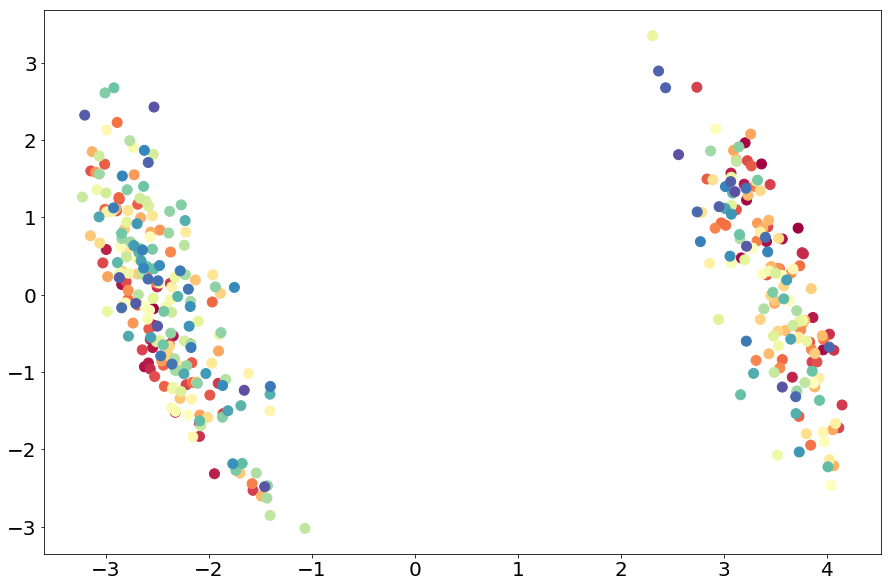

In [36]:
pca_embedding=PCA(n_components=2).fit_transform(cordata)
# Fitting Model
x = np.linspace(1,10,370)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],c=x, cmap='Spectral',s=100)

In [37]:
pca=PCA(n_components=4).fit(cordata)

In [38]:
pca.explained_variance_ratio_

array([0.69226037, 0.11383891, 0.10279451, 0.05069299])

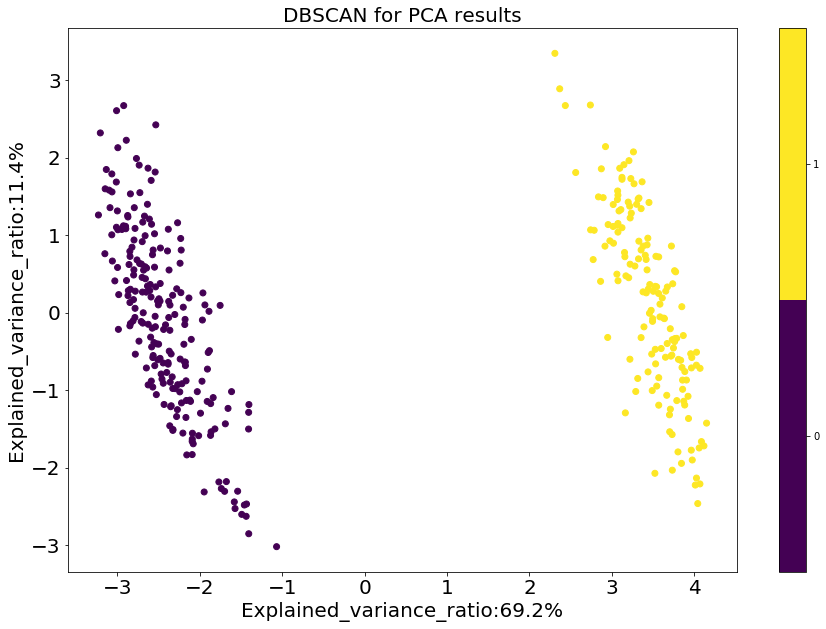

In [39]:
y_pred_pca = DBSCAN(eps = 0.9,min_samples=10).fit_predict(pca_embedding)
plt.figure(figsize=(15,10))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=y_pred_pca)

cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1]
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Explained_variance_ratio:69.2%',fontsize=20)
plt.ylabel('Explained_variance_ratio:11.4%',fontsize=20)
plt.title("DBSCAN for PCA results",fontsize=20)

plt.show()

In [40]:
y_pred_pca+=1
y_pred_pca

array([1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,

In [41]:
new_dic_pca=getNewDic(trans_list,y_pred_pca)
#print(new_dic_tsne)
dic_pca_class0=getClass(new_dic_pca,0)
dic_pca_class1=getClass(new_dic_pca,1)

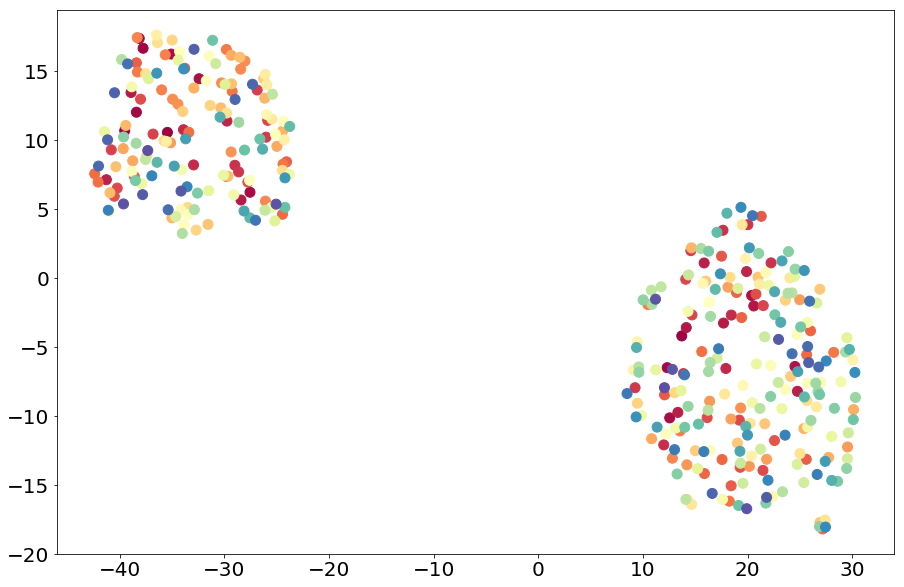

In [42]:
rng = np.random.RandomState(0)
# Defining Model
model = TSNE(random_state=42)

# Fitting Model
transformed = model.fit_transform(cordata)

# Plotting 2d t-Sne
plt.figure(figsize=(15,10))
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
x = np.linspace(1,10,370)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x_axis, y_axis, c=x,cmap='Spectral',s=100)
plt.show()

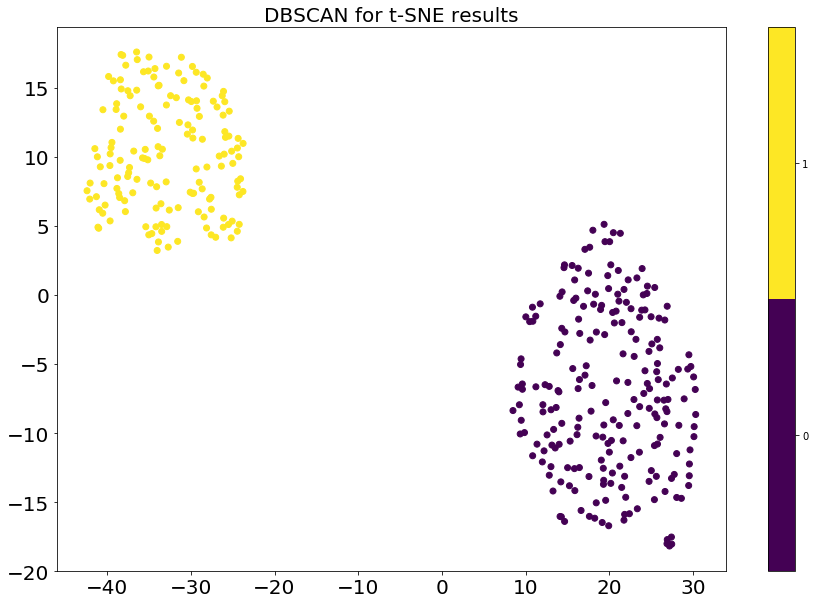

In [43]:
y_pred_tsne = DBSCAN(eps = 3.7,min_samples=10).fit_predict(transformed)
plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, c=y_pred_tsne)
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for t-SNE results",fontsize=20)
plt.show()

In [44]:
y_pred_tsne+=1
y_pred_tsne

array([1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,

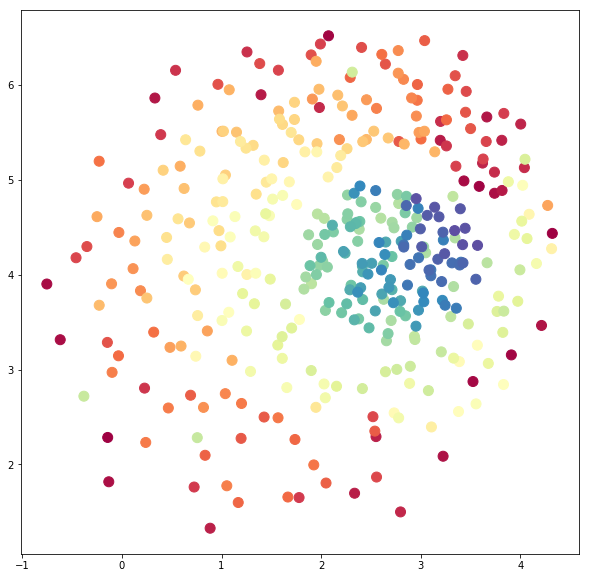

In [45]:
standard_embedding_jac = umap.UMAP(random_state=42,n_neighbors=10,metric='jaccard').fit_transform(cordata)
x = np.linspace(1,10,370)
plt.figure(figsize=(10,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1],c=x, cmap='Spectral',s=100)

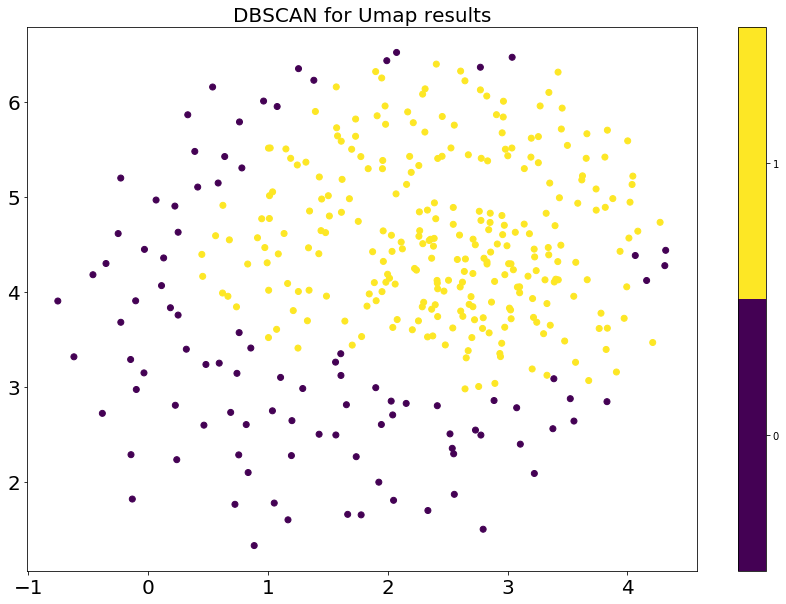

In [46]:
y_cor_umap = DBSCAN(eps = 0.4,min_samples=10).fit_predict(standard_embedding_jac)
plt.figure(figsize=(15,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1], c=y_cor_umap+1)
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1]
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for Umap results",fontsize=20)
plt.show()

In [47]:
max_pred_data=np.amax(combined_matrix.values,axis=1)
max_pred_data

array([ 0,  0,  0,  0,  0,  0,  7,  4,  0, 18,  0,  0,  0, 23, 19, 20,  0,
        0, 13,  0,  0,  1,  0,  4,  0,  0,  4, 20,  0,  0,  0,  2,  3,  0,
        0,  0,  0,  0,  0,  0,  2,  0, 10,  0,  0,  6,  0,  0,  0,  4,  0,
        0, 13,  0, 11,  4,  8,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0, 52,  0,  0,  0,  2,  0,
        0,  0,  0,  2,  0,  2,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,
       23,  0,  5,  0,  0,  0,  0,  0,  0,  8,  0,  0,  6,  9,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  8,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0, 19,  4,  0,  0, 56,  0,  1,  0,
        0,  0,  3,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  4,  0,  0,  4,
        0,  0,  0,  0,  2,  0,  0,  2,  0,  0,  0,  6,  0,  0,  8,  0,  0,
        0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  1,
        0,  0,  0,  0,  7,  0,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0,  3,
        0,  0,  0,  0,  0

In [51]:
mapping=dict(zip(trans_list,max_pred_data))
L=sorted(mapping.items(),key=lambda mapping:mapping[1],reverse=True)

In [52]:
L

[('EMBV3_33550', 56),
 ('EMBV3_39217', 52),
 ('EMBV3_02698', 38),
 ('EMBV3_38036', 32),
 ('EMBV3_01236', 29),
 ('EMBV3_31178', 27),
 ('EMBV3_35013', 23),
 ('EMBV3_42877', 23),
 ('EMBV3_35158', 20),
 ('EMBV3_33890', 20),
 ('EMBV3_04354', 19),
 ('EMBV3_01502', 19),
 ('EMBV3_32250', 19),
 ('EMBV3_39314', 18),
 ('EMBV3_30395', 17),
 ('EMBV3_38569', 17),
 ('EMBV3_19147', 16),
 ('EMBV3_40194', 15),
 ('EMBV3_08059', 15),
 ('EMBV3_05327', 14),
 ('EMBV3_29779', 13),
 ('EMBV3_04113', 13),
 ('EMBV3_33015', 12),
 ('EMBV3_29960', 12),
 ('EMBV3_12962', 11),
 ('EMBV3_00623', 11),
 ('EMBV3_34560', 10),
 ('EMBV3_07816', 10),
 ('EMBV3_02731', 9),
 ('EMBV3_33523', 8),
 ('EMBV3_33638', 8),
 ('EMBV3_15296', 8),
 ('EMBV3_06839', 8),
 ('EMBV3_14991', 8),
 ('EMBV3_04815', 7),
 ('EMBV3_34598', 7),
 ('EMBV3_09391', 7),
 ('EMBV3_13357', 6),
 ('EMBV3_15137', 6),
 ('EMBV3_38171', 6),
 ('EMBV3_01963', 6),
 ('EMBV3_40785', 6),
 ('EMBV3_43227', 5),
 ('EMBV3_42829', 5),
 ('EMBV3_39520', 5),
 ('EMBV3_35222', 4),
 ('EMB

In [48]:
import matplotlib.ticker as ticker

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

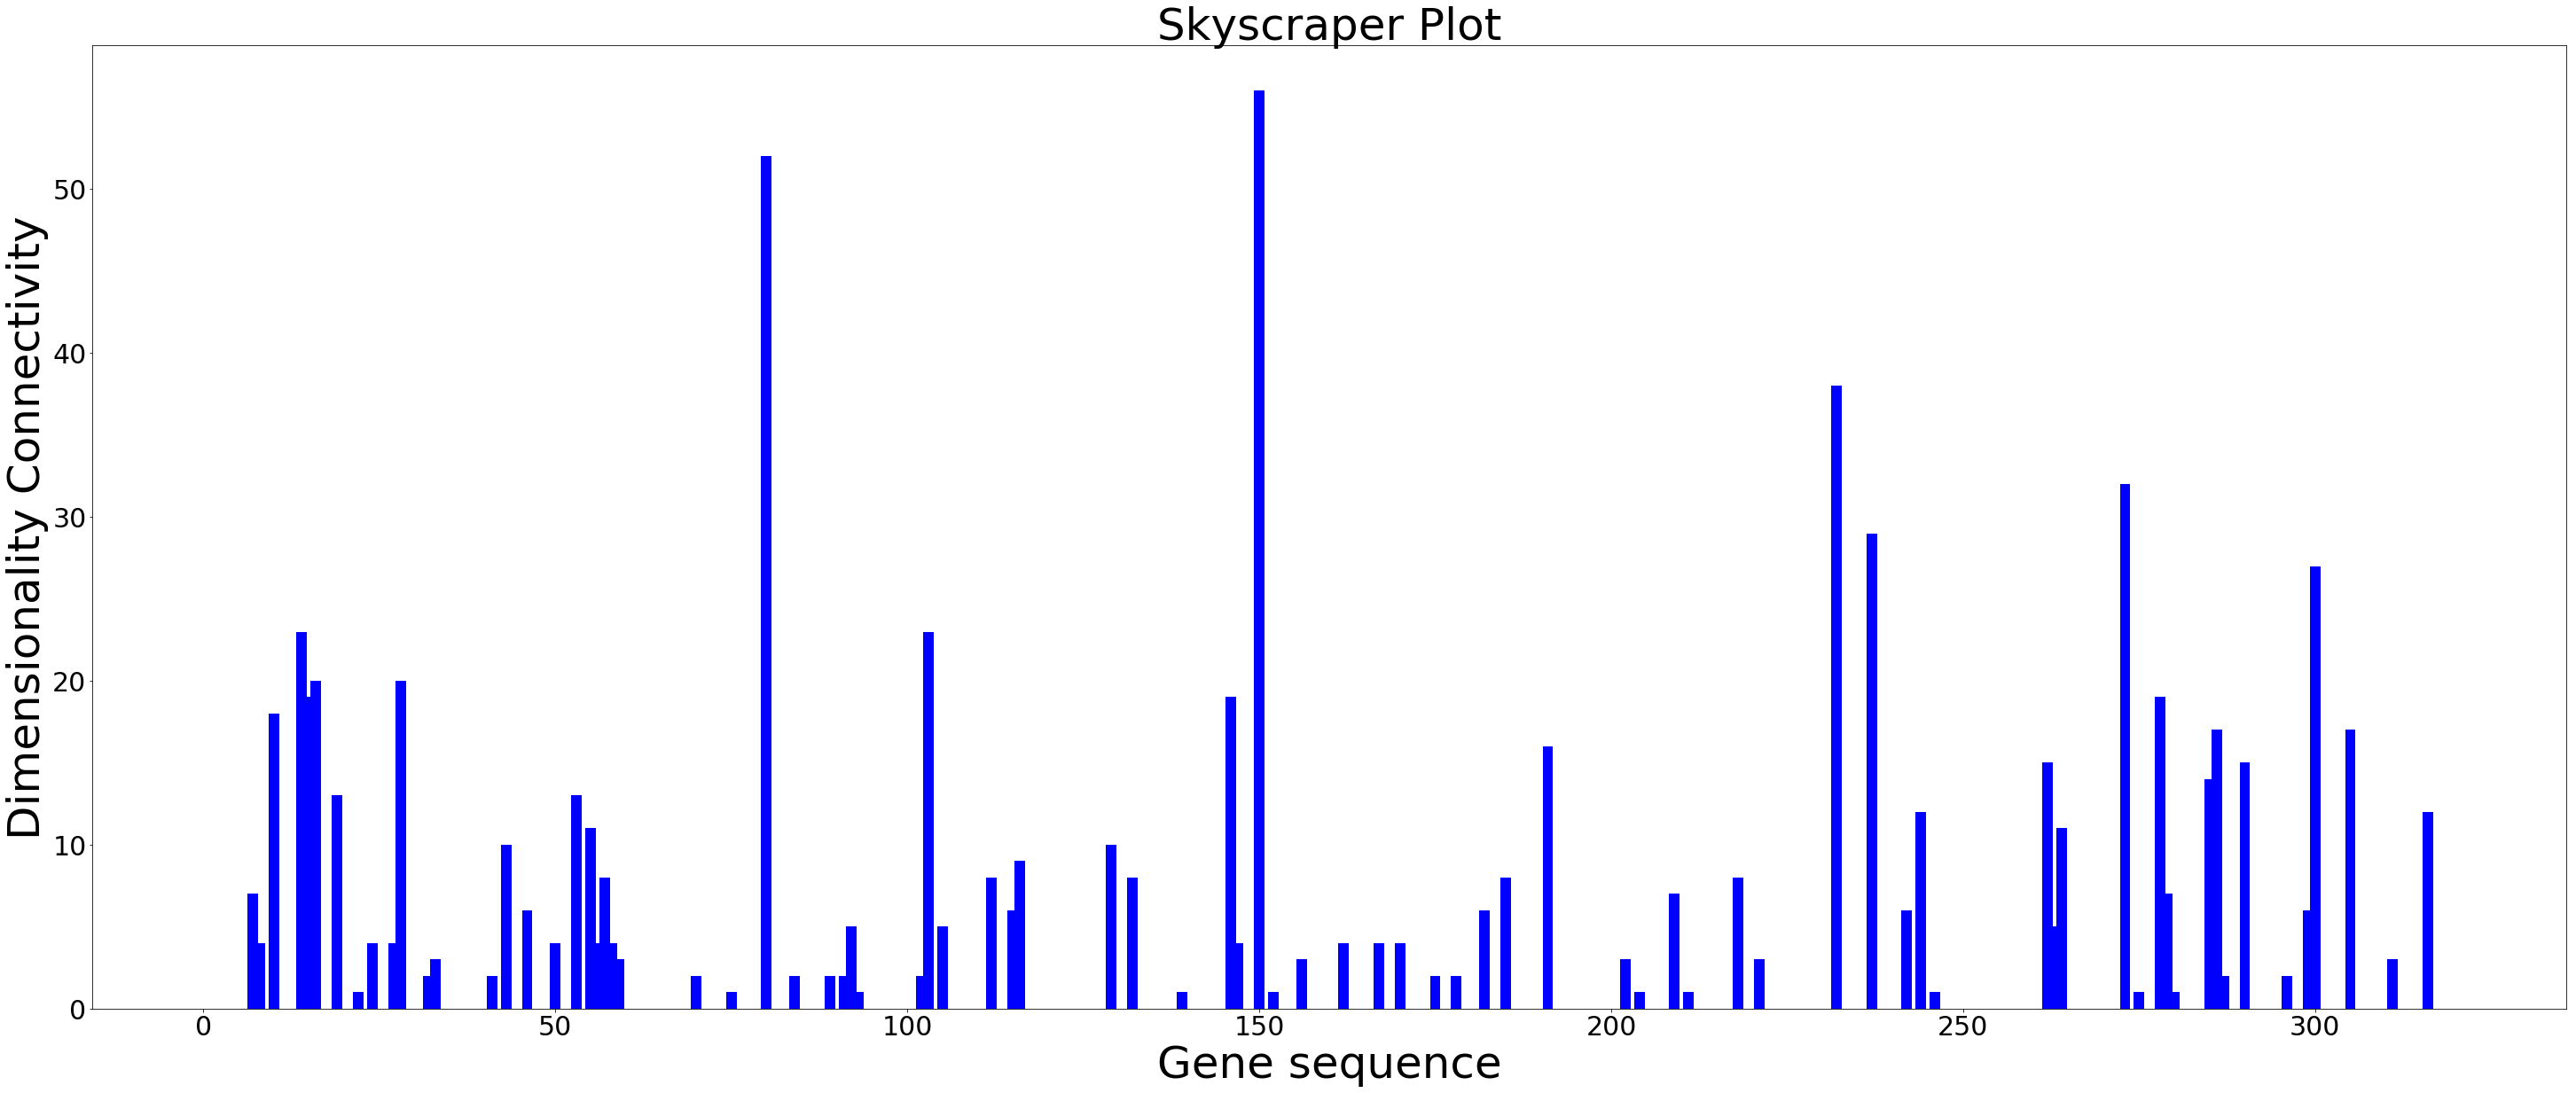

In [49]:
x_max_pred_data=[x for x in range(1,320)]
fig, ax = plt.subplots(figsize=(50,20))
plt.bar(x_max_pred_data,max_pred_data, width=1.5, color='b')

plt.title("Skyscraper Plot",fontsize=50)
plt.ylabel("Dimensionality Connectivity",fontsize=50)
plt.xlabel("Gene sequence",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

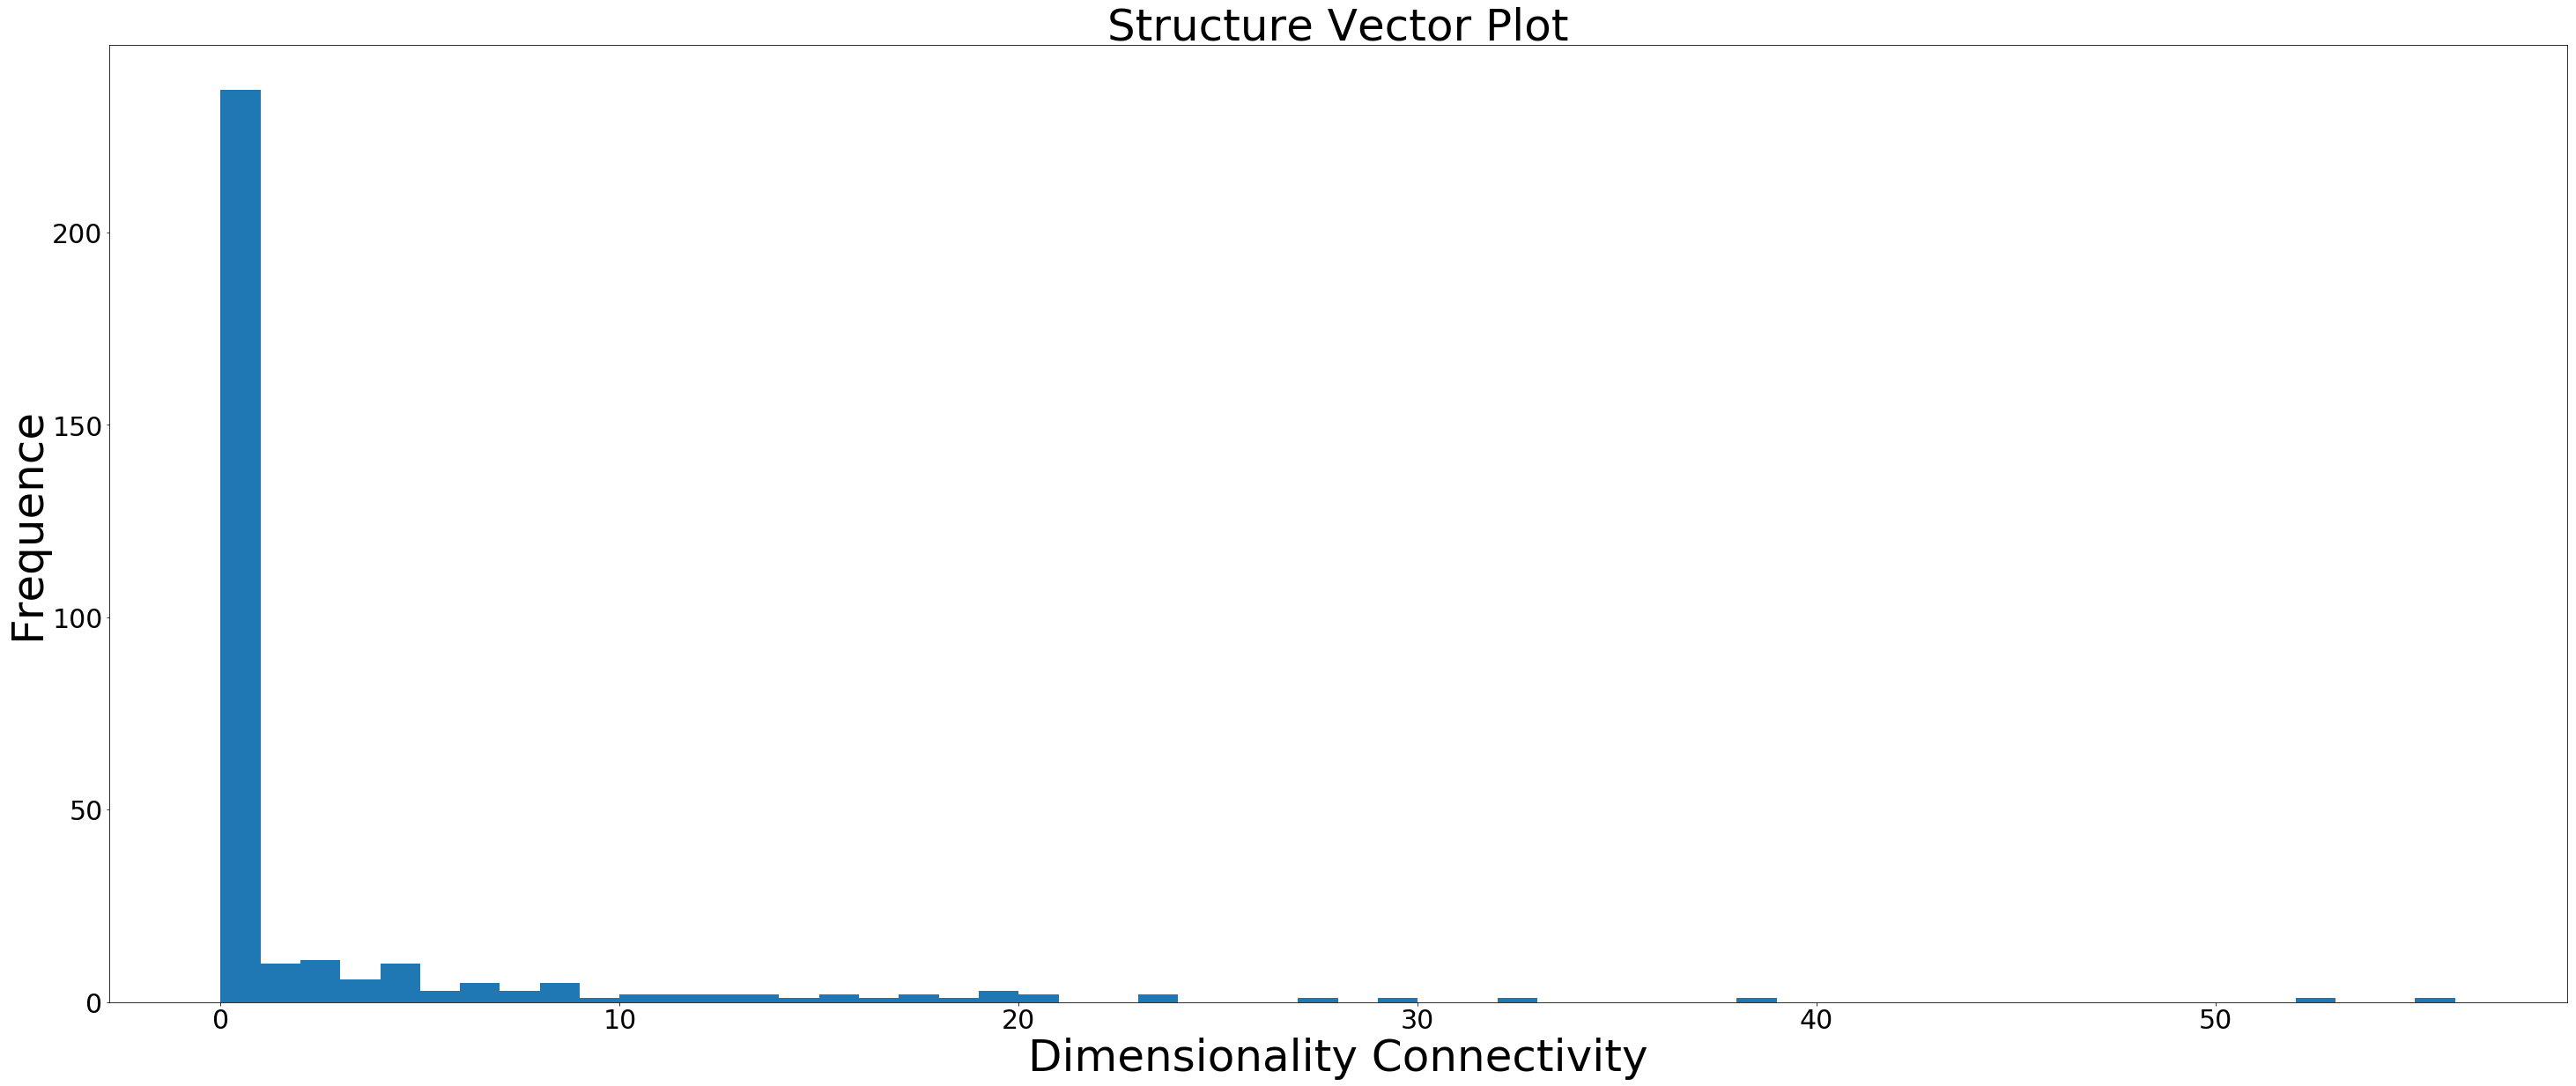

In [50]:
fig, ax = plt.subplots(figsize=(50,20))
plt.hist(max_pred_data,bins=56)
plt.title("Structure Vector Plot",fontsize=50)
plt.ylabel("Frequence",fontsize=50)
plt.xlabel("Dimensionality Connectivity",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)